The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.


In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (ex:Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# Problem Statement
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing the face, mark the attendance, log the individual’s session time and put a drowsiness alert.

## Face Recognition
This is a few shot learning live face attendance systems. The model should be able to real-time identify attending students in the live class based on few images of students.

## Drowsiness detector
This will detect facial landmarks and extract the eye regions. The algorithm should be able to identify students who are not attentive and drowsing in the class.

**We will solve above mention problems separately and later will integrate them before deployment.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import cv2
# import face_recognition as fr
# imgAng = fr.load_image_file('andrew_ng.jpg')
# Test = fr.load_image_file('ian_godfellow.jpg')
# fLoc = fr.face_locations(imgAng)[0]
# encodeAng = fr.face_encodings(imgAng)[0]
# fLocTest = fr.face_locations(Test)[0]
# encTest = fr.face_encodings(Test)[0]
# result = fr.compare_faces([encodeAng],encTest)
# faceDist = fr.face_distance([encodeAng],encTest)
# print(result,faceDist)

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=4a9e625f7980fddceac0cc2b8aed4b817e50d76dc18e912a124ef94431f7f81a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import cv2
import face_recognition as fr

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
from datetime import datetime

In [ ]:
img_path = "/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/Faces/"

**Training Images**

Importing the faces using load_image_file method provided by face_recognition library.

In [ ]:
img_1 = fr.load_image_file(img_path + "Dishant.jpg")
img_2 = fr.load_image_file(img_path + "Elon.jpg")
img_3 = fr.load_image_file(img_path + "Sundar.jpeg")

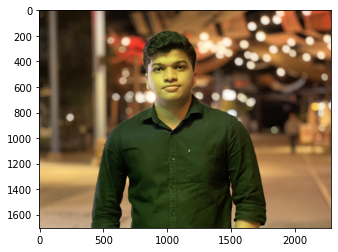

In [ ]:
plt.imshow(img_1)

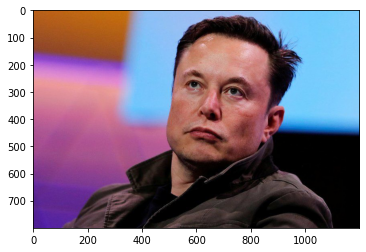

In [ ]:
plt.imshow(img_2)

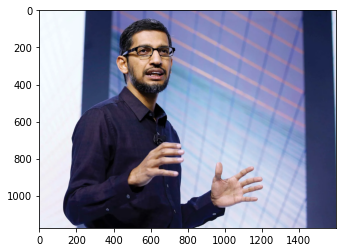

In [ ]:
plt.imshow(img_3)

Encoding the images we imported into vectors.

In [ ]:
img_1_encoded = fr.face_encodings(img_1)[0]
img_2_encoded = fr.face_encodings(img_2)[0]
img_3_encoded = fr.face_encodings(img_3)[0]

In [ ]:
img_1_encoded

array([-1.61329761e-01,  4.90797646e-02,  4.32747081e-02, -4.73961979e-02,
       -5.73005006e-02, -1.04444996e-01, -9.07788426e-03, -7.28393719e-02,
        1.29555672e-01, -8.55164379e-02,  1.88434228e-01, -4.33902219e-02,
       -1.57140806e-01, -2.11698294e-01,  3.55191305e-02,  1.55912116e-01,
       -1.35061622e-01, -1.64633289e-01, -8.31190795e-02, -8.39658976e-02,
        2.18002200e-02, -2.28548497e-02,  2.39668414e-02,  1.20524809e-01,
       -1.29283994e-01, -4.01512265e-01, -5.54511435e-02, -1.31173015e-01,
        6.28384948e-02, -8.57432485e-02,  1.12536475e-02,  8.54882225e-02,
       -2.58270979e-01, -7.31725693e-02, -2.98089832e-02,  1.58908457e-01,
        8.12780187e-02,  3.10535058e-02,  1.37452453e-01,  6.75214827e-03,
       -2.05314606e-01, -9.15810838e-02,  5.26519865e-03,  2.12496042e-01,
        1.70874521e-01,  2.31001452e-02,  4.47539017e-02,  6.63822293e-02,
        9.97526646e-02, -2.26430178e-01,  6.60958141e-03,  6.57795295e-02,
        1.61871642e-01, -

In [ ]:
img_2_encoded

array([-6.97930306e-02,  1.03563294e-01,  1.87207326e-01, -2.98608392e-02,
       -1.42963365e-01,  1.98668391e-02,  5.59914485e-03, -1.25999466e-01,
        1.79225668e-01, -6.95827678e-02,  2.93037832e-01, -4.20281664e-02,
       -3.06082278e-01, -2.59537026e-02,  1.12903565e-02,  1.39780894e-01,
       -1.47101492e-01, -1.45197079e-01, -5.30815087e-02, -9.98095423e-02,
        4.85320985e-02,  6.34620786e-02,  1.94470435e-02, -8.89378488e-02,
       -1.32109165e-01, -3.38437319e-01, -1.14963725e-01, -6.59807771e-02,
        1.04777411e-01, -2.77104154e-02,  4.48668003e-02,  6.58093840e-02,
       -1.64735004e-01, -8.39664862e-02,  5.62269017e-02,  5.01041263e-02,
       -6.49985746e-02, -9.06320363e-02,  1.69388473e-01, -2.58600377e-02,
       -1.59662634e-01, -3.63195091e-02,  8.20614398e-04,  1.75429881e-01,
        1.40943646e-01,  6.55841306e-02,  8.63932595e-02, -1.43874571e-01,
        6.11066222e-02, -2.28335351e-01,  7.32568651e-02,  1.55659467e-01,
        2.41710097e-02,  

In [ ]:
img_3_encoded

array([-0.24930361,  0.09375472,  0.11322301,  0.02025622, -0.02107435,
       -0.03114855, -0.08405457, -0.05890146,  0.1615729 , -0.10509388,
        0.20254007,  0.01403151, -0.18119431, -0.10107   , -0.05809585,
        0.11706194, -0.06631919, -0.13528794, -0.10321831, -0.13403742,
        0.00446685, -0.02486032,  0.02076397, -0.01396577, -0.23780355,
       -0.36264732, -0.10706878, -0.09828325, -0.01281715, -0.05093755,
       -0.04230176, -0.01666288, -0.15865165, -0.0780428 , -0.00627586,
        0.19704838,  0.01764047,  0.01012675,  0.16777605, -0.05434734,
       -0.09747479,  0.01320634,  0.08478821,  0.28066465,  0.18244277,
        0.06535724,  0.03664775, -0.02516955,  0.062031  , -0.22525549,
        0.1510832 ,  0.0971624 ,  0.11973315,  0.0766214 ,  0.16538659,
       -0.10823868, -0.00511055,  0.14563918, -0.13124874,  0.05969144,
        0.05642771, -0.0181151 , -0.07097767, -0.04771798,  0.22712466,
        0.19467391, -0.13752523, -0.07926143,  0.18394026, -0.15

In [ ]:
known_face_encodings = [
    img_1_encoded,
    img_2_encoded,
    img_3_encoded
]

In [ ]:
known_face_names = [
    "Dishant",
    "Elon",
    "Sundar"
]

**Function to add names into the *'attendance.csv'* file**

In [ ]:
def markAttendance(name):
    with open('/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/attendance.csv', 'r+') as FILE:
        allLines = FILE.readlines()
        attendanceList = []

        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])

        if name not in attendanceList:
            now = datetime.now()
            dtstring = now.strftime('%d/%b/%Y, %H:%M:%S')
            FILE.writelines(f"\n{name}, {dtstring}")

**Performing Face Recognition and Entering Attendance in the FILE**

In [ ]:
test_path = "/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/Test/"

In [ ]:
test_img_name = test_path + "4.jpg"

Elon


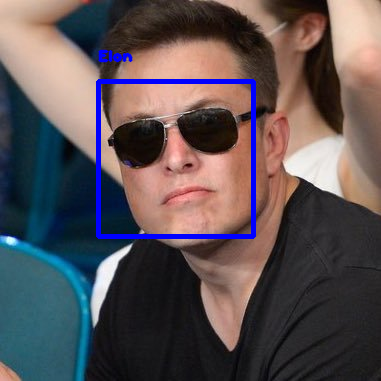

In [ ]:
from face_recognition.api import face_encodings
unknown_image = fr.load_image_file(test_img_name)
unknown_image_to_draw = cv2.imread(test_img_name)

face_locations = fr.face_locations(unknown_image)
face_encodings = fr.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    ##Check if both face are mathcing
    matches = fr.compare_faces(known_face_encodings, face_encoding)

    name = "unknown"

    face_distances = fr.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)

    if matches[best_match_index]:
        name = known_face_names[best_match_index]
    
    ##Draw box around a face
    cv2.rectangle(unknown_image_to_draw, (left,top), (right, bottom), (255, 0, 0), 3)
    draw.rectangle(((left,top), (right,bottom)), outline=(255, 255, 0))
    cv2.putText(unknown_image_to_draw, name, (left, top-20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2, cv2.LINE_AA)
    print(name)
    markAttendance(name)

##Display Image 
cv2_imshow(unknown_image_to_draw)

**Drowsiness Detection**

In [6]:
eye_dataset_path_train = "/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/Eye Dataset/train/"

In [7]:
import matplotlib.image as mpimg
from matplotlib.image import imread
import tensorflow as tf 
import os

In [8]:
img_array = cv2.imread(eye_dataset_path_train + "Closed/s0001_00292_0_0_0_0_0_01.png")

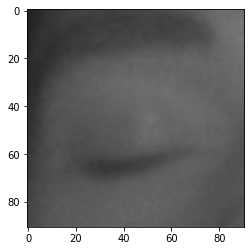

In [9]:
plt.imshow(img_array)

In [10]:
img_array.shape

(91, 91, 3)

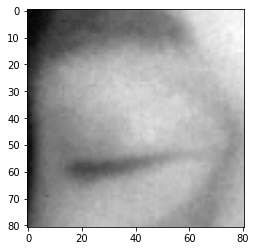

In [11]:
DataDirectoryTrain = eye_dataset_path_train
classes = ["Closed", "Open"]
for category in classes:
    path = os.path.join(DataDirectoryTrain, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

**Changing image shape fto 224 x 224 as transfer learning (CNN) model which are pre-trained are trained on 224 x 224 images.**

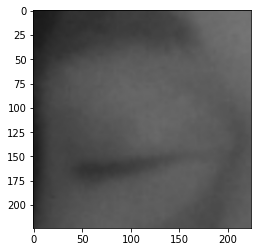

In [12]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array)
plt.show()

**Applyting above logic to every image present**

In [13]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(DataDirectoryTrain, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [14]:
create_training_data()

In [15]:
len(training_data)

2381

**Repeating the above same process for test dataset.**

In [16]:
eye_dataset_path_test = "/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/Eye Dataset/test/"

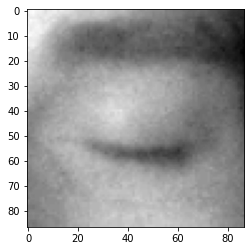

In [17]:
DataDirectoryTest = eye_dataset_path_test
classes = ["Closed", "Open"]
for category in classes:
    path = os.path.join(DataDirectoryTest, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

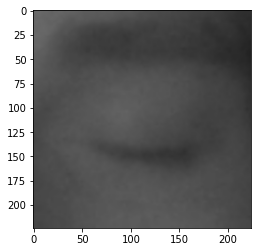

In [18]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [19]:
testing_data = []

def create_testing_data():
    for category in classes:
        path = os.path.join(DataDirectoryTest, category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

In [20]:
create_testing_data()

In [21]:
len(testing_data)

576

In [22]:
import random
random.shuffle(training_data)
random.shuffle(testing_data)

**Separating features and target.**

In [23]:
##Training dataset
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ##Converting into 4 dimensions

In [24]:
X.shape

(2381, 224, 224, 3)

In [25]:
len(y)

2381

In [26]:
##Testing data
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
    
X_test=np.array(X_test).reshape(-1, img_size, img_size, 3)

In [27]:
X_test.shape

(576, 224, 224, 3)

In [28]:
len(y_test)

576

**Normalizing the data**

In [29]:
X = X / 255.0;
X_test = X_test/255.0;

In [30]:
y = np.array(y)
y_test = np.array(y_test)

In [31]:
y.shape

(2381,)

In [32]:
y_test.shape

(576,)

**Saving the Data**

In [33]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

**Deep Learning Model - Transfer Learning**

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

**Initializing the model for training. Many model are pre-trained we can use any one of them. We will try *mobilenet* and check the accuracy it gives.**

In [35]:
model_1 = tf.keras.applications.mobilenet.MobileNet()

In [36]:
model_1.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

*From the above summary we can observe that the input layer of mobilenet expects the shape of an image to be 224x224. Therefore we reshaped.*

**Applying transfer learning**

In [37]:
base_input = model_1.layers[0].input ##selecting input as input layer for model i.e., mobilenet
base_output = model_1.layers[-4].output ##Selecting 4th last layer(Drop out layer) as the output layer from mobilenet model
flat_layer = layers.Flatten()(base_output) ##Flattening the output layer into vector
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [38]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [39]:
base_output

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'dropout')>

In [40]:
flat_layer

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten')>

In [41]:
final_output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation')>

In [42]:
final_output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation')>

In [43]:
new_model_1 = keras.Model(inputs = base_input, outputs = final_output)

In [44]:
new_model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

**Compiling a model for binary classification.**

In [45]:
new_model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Training the model using fit().**

In [47]:
history = new_model_1.fit(X,y, 
                          epochs=5,
                          validation_data = (X_test, y_test)
                        )

Epoch 1/5
75/75 [==============================] - 27s 354ms/step - loss: 0.1152 - accuracy: 0.9714 - val_loss: 9.4940 - val_accuracy: 0.5000
Epoch 2/5
75/75 [==============================] - 24s 324ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 1.3086 - val_accuracy: 0.5399
Epoch 3/5
75/75 [==============================] - 25s 327ms/step - loss: 0.0298 - accuracy: 0.9891 - val_loss: 0.9774 - val_accuracy: 0.7517
Epoch 4/5
75/75 [==============================] - 26s 347ms/step - loss: 0.0211 - accuracy: 0.9920 - val_loss: 1.1758 - val_accuracy: 0.8125
Epoch 5/5
75/75 [==============================] - 24s 325ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0644 - val_accuracy: 0.9740


In [48]:
new_model_1.save("drowsiness_model_2.h5")

**Plotting the accuracy**

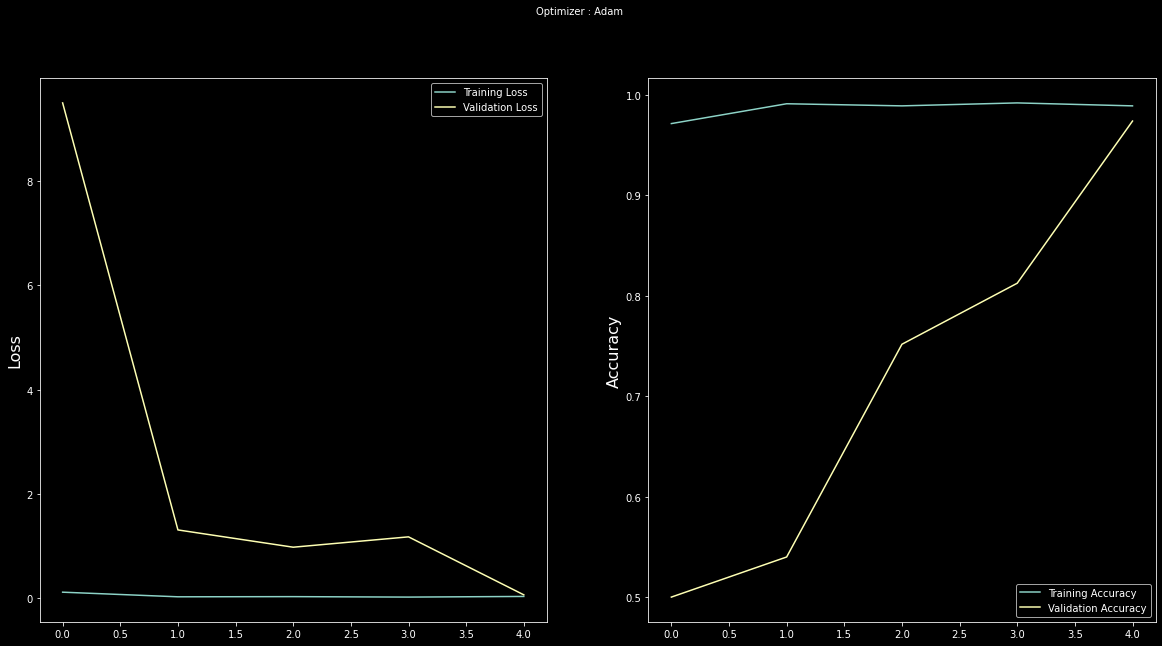

In [49]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

*We can observe the **training accuracy of 98.91%** and **validation accuracy of 97.40%**.*

**Checking the values our model gives when eyes are closes or open.**

In [50]:
img_array = cv2.imread(eye_dataset_path_test + "Closed/s0001_00199_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [51]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [52]:
X_input.shape

(1, 224, 224, 3)

In [53]:
X_input = X_input / 255.0

In [54]:
pred = new_model_1.predict(X_input)

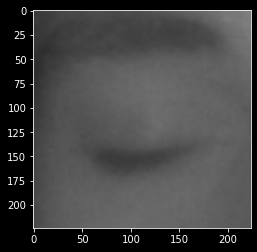

In [55]:
plt.imshow(new_array)

In [56]:
pred

array([[9.912058e-07]], dtype=float32)

*We can see the value 1.7394045e-08 which is approximately equals to 0.00167. This says that there is 0.0005% probability that a eye is open.*

In [57]:
img_array = cv2.imread(eye_dataset_path_test + "Open/s0001_02277_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [58]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [59]:
X_input.shape

(1, 224, 224, 3)

In [60]:
X_input = X_input / 255.0

In [61]:
new_model_1.predict(X_input)

array([[0.9999999]], dtype=float32)

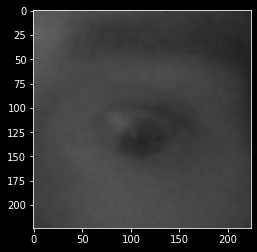

In [62]:
plt.imshow(new_array)

*99% probability that the eye is open.*

*Thus we can say that when value is close to 1 than eyes are open and when it is close to 0 then eyes are closed.* 

**Now instead of eyes, let's check out model on the image of any person.**

In [64]:
img = cv2.imread("/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/sleepy.jpeg")

In [65]:
import matplotlib.pyplot as plt

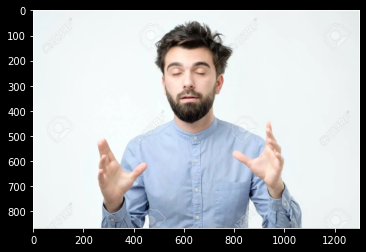

In [66]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Detecting face & then detecting eyes in face using haarcascade face detection.**

In [67]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [68]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [69]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [70]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [71]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

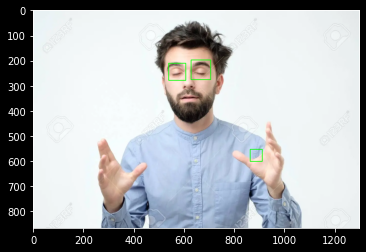

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**Cropping the eye as our model is trained on eye images.**

In [73]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("Eyes not detected")
    else:
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]

Eyes not detected


In [74]:
len(eyes)

0

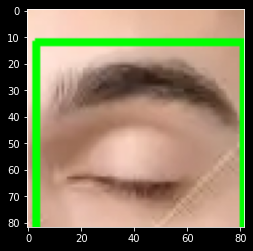

In [75]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [76]:
eyes_roi.shape

(82, 82, 3)

In [77]:
len(eyes_roi)

82

In [78]:
## Reshaping the input image
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0) ##Expanding to 4 dimensions
final_image = final_image / 255.0 ##Normalizing

In [79]:
final_image.shape

(1, 224, 224, 3)

In [80]:
from keras.models import load_model

In [83]:
pred = new_model_1.predict(final_image)

In [84]:
pred

array([[0.11253951]], dtype=float32)

**Repeating the same for Person with open eye.**

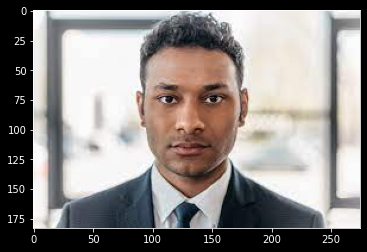

In [85]:
img = cv2.imread("/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/Data/awake.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [86]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

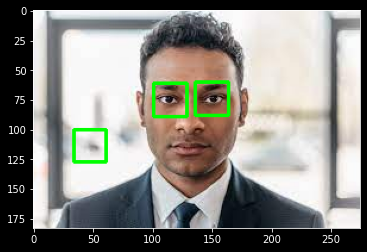

In [87]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [88]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray)
    if len(eyes) == 0:
        print("Eyes not detected")
    else:
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]

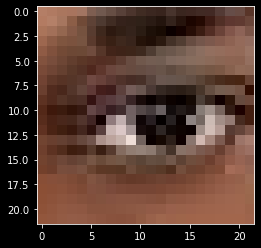

In [89]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [90]:
## Reshaping the input image
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0) ##Expanding to 4 dimensions
final_image = final_image / 255.0 ##Normalizing

In [91]:
pred = new_model_1.predict(final_image)

In [92]:
pred

array([[0.99999976]], dtype=float32)

**Drowsiness Detection on live video using google colab.**

In [93]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [94]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [95]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [96]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
from zmq.sugar import frame
from google.colab.patches import cv2_imshow
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  new_model_1 = load_model("/content/drive/MyDrive/AlmaBetter/Capstone Project/DL + MLE Capstone Project/drowsiness_model_2.h5")

#   face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # # create transparent overlay for bounding box
    # bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print("Eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]

        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0) ##Expanding to 4 dimensions
        final_image = final_image / 255.0 ##Normalizing
                    
        pred = new_model_1.predict(final_image)
        if (pred > 0.2):
            status = "Open Eyes"
            # elif (pred > 0.5 or pred <= 0.9):
            #     status = "Bit Drowsy"
        else:
            status = "Closed Eyes"

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(face_cascade.empty())
        print(pred)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        ##Draw rectangle around face
        for(x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.putText(img,status,(50, 50),cv2.FONT_HERSHEY_SIMPLEX,3,(0,255,0),2, cv2.LINE_4)
        cv2_imshow(img)

In [102]:
face_detect()

Output hidden; open in https://colab.research.google.com to view.

**We can observe that our model is doing well on real world data. Hence, we can go ahead with the development and deployment of model using streamlit or heroku.**